# Laboratorio 6 SDS - Hunting with Data Science
## Andre Rodriguez
## Ricardo Valenzuela

In [73]:
from keras.preprocessing.image import ImageDataGenerator

In [74]:
all_images = ImageDataGenerator().flow_from_directory("..\malimg_dataset\images_to_use", (128, 128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [75]:
for key, values in all_images.class_indices.items():
    print(key, values)

Adialer.C 0
Agent.FYI 1
Allaple.A 2
Allaple.L 3
Alueron.gen!J 4
Autorun.K 5
C2LOP.P 6
C2LOP.gen!g 7
Dialplatform.B 8
Dontovo.A 9
Fakerean 10
Instantaccess 11
Lolyda.AA1 12
Lolyda.AA2 13
Lolyda.AA3 14
Lolyda.AT 15
Malex.gen!J 16
Obfuscator.AD 17
Rbot!gen 18
Skintrim.N 19
Swizzor.gen!E 20
Swizzor.gen!I 21
VB.AT 22
Wintrim.BX 23
Yuner.A 24


Vemos hasta 25 diferentes tipos de malwares

In [76]:
images, targets = next(all_images)

In [77]:
print(images.shape)
print(targets.shape)

(9339, 128, 128, 3)
(9339, 25)


Vemos que tenemos 9339 imagenes de tamanio 128x128 y el 3 nos indica que esta en RGB  
Tambien vemos que de las 9339 imagenes exiten 25 etiquetas

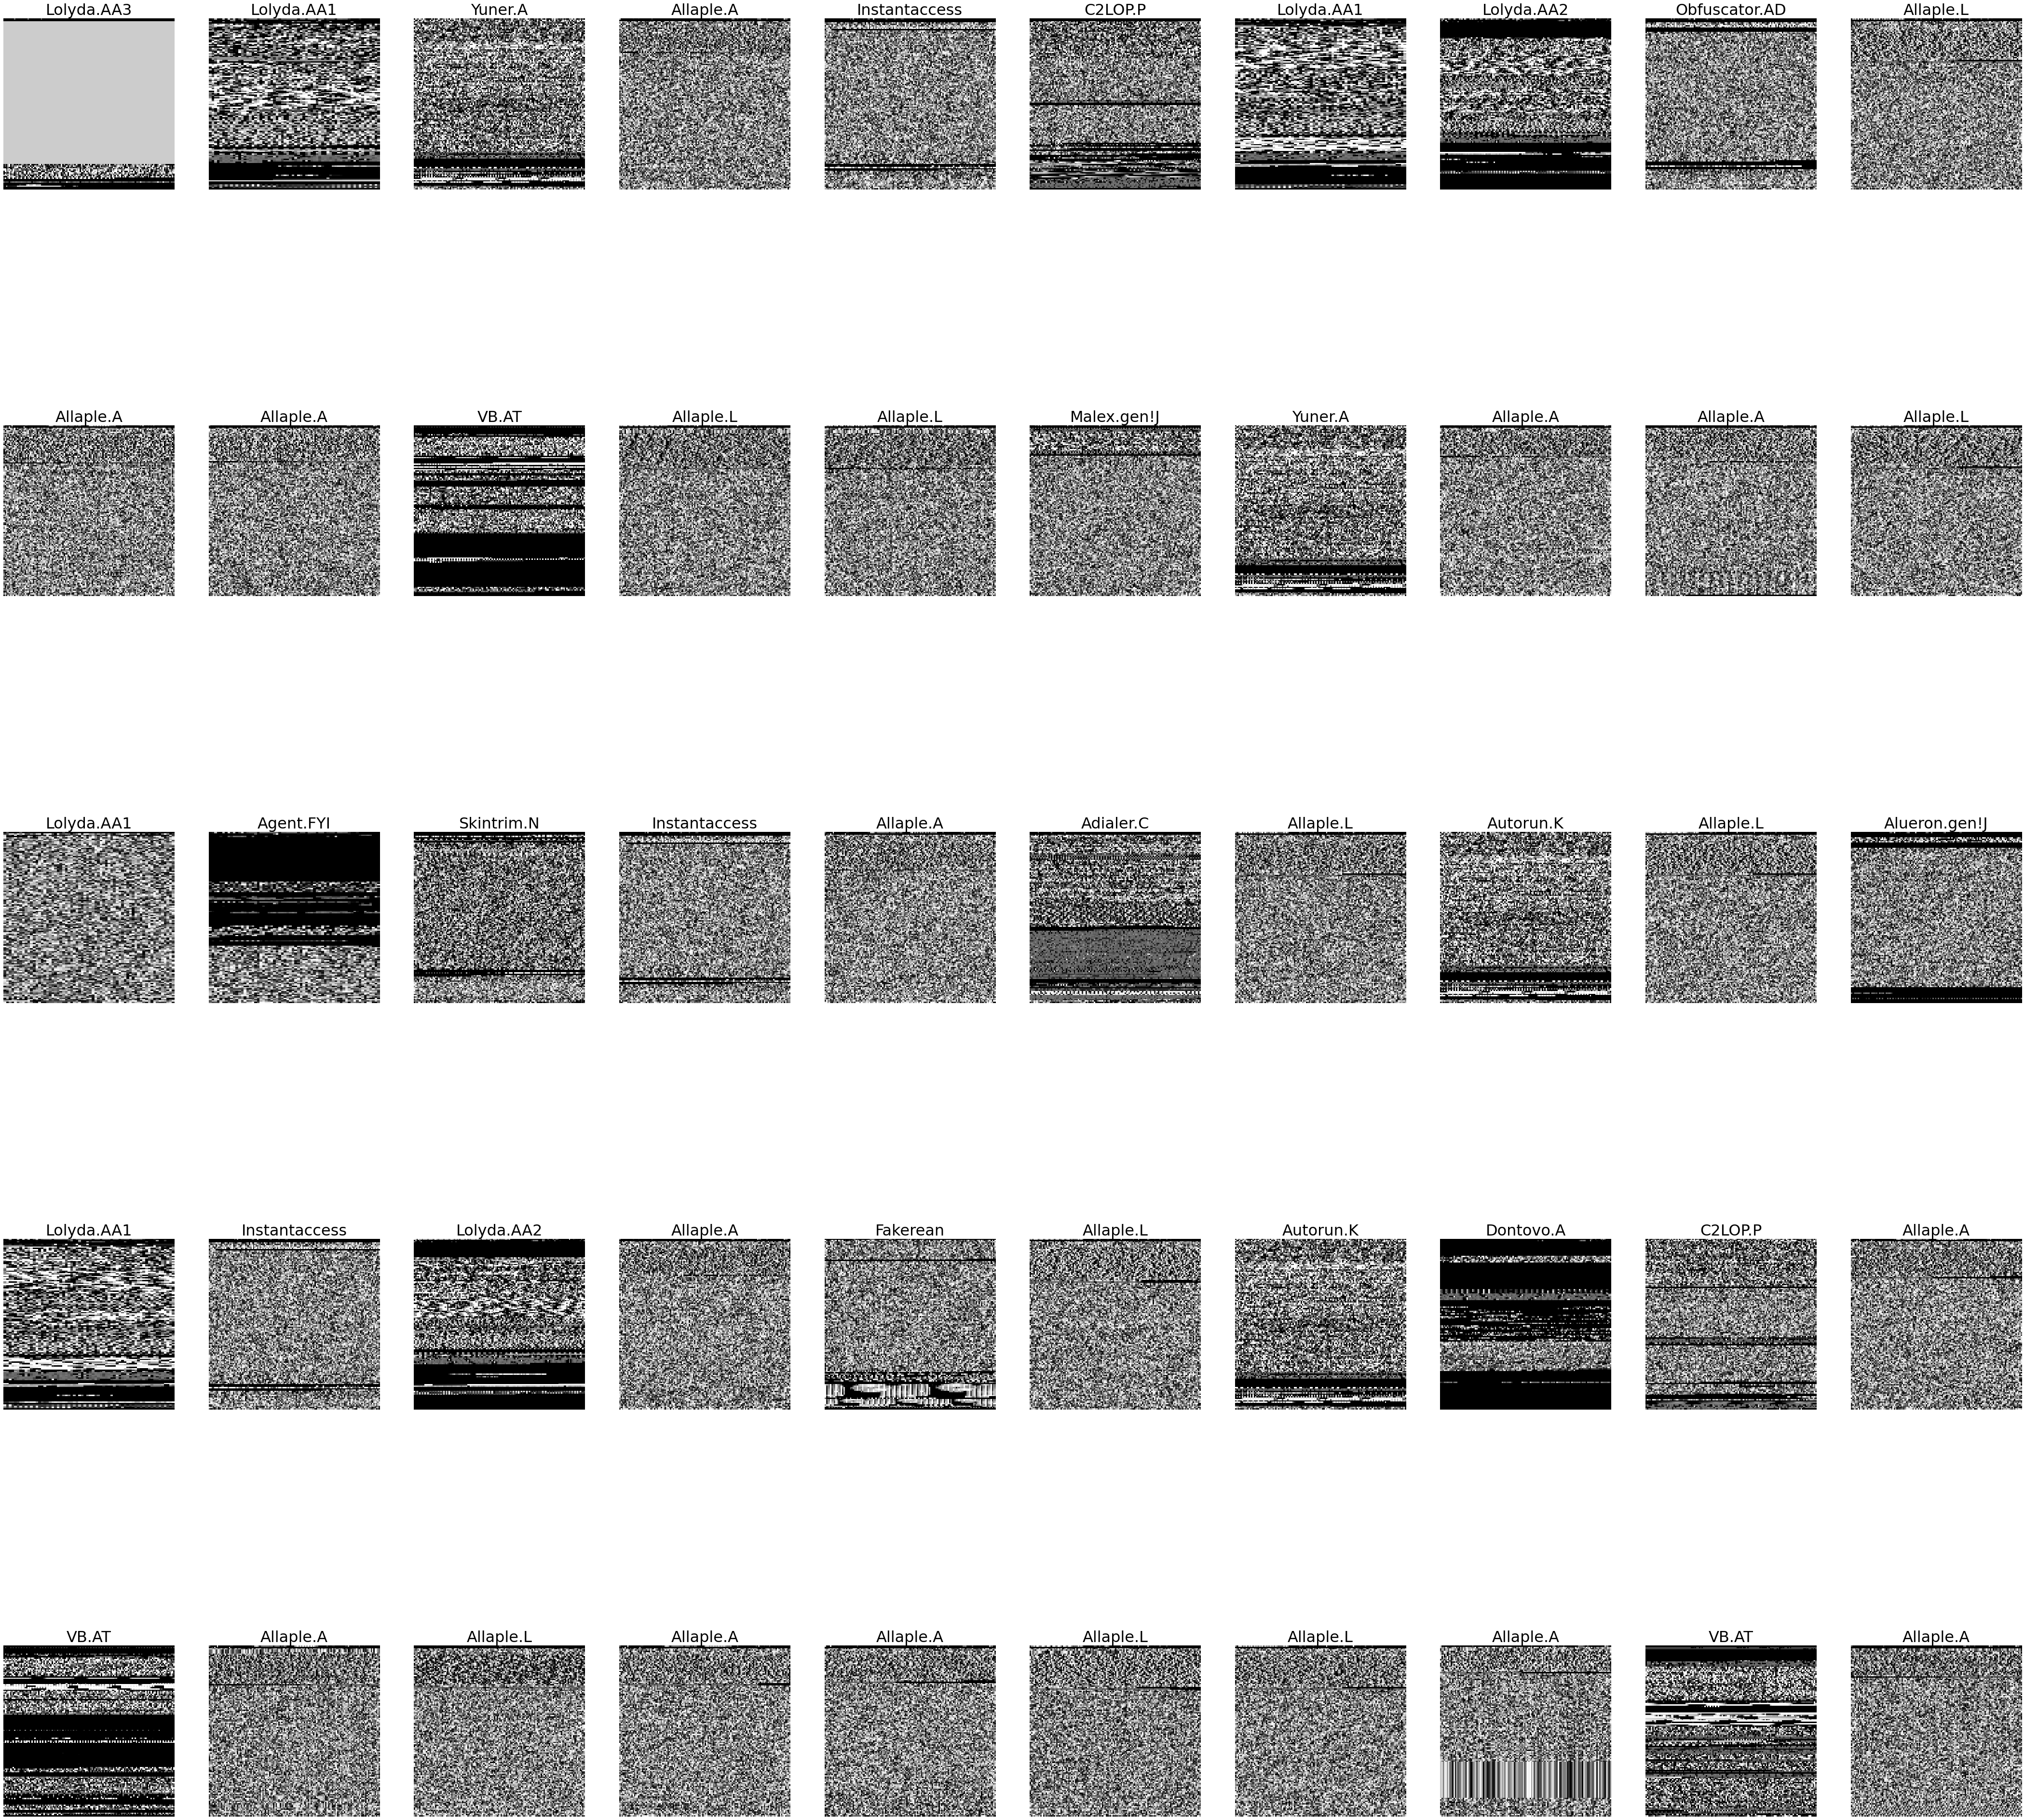

In [104]:
import numpy as np
import matplotlib.pyplot as plt
img = np.array(images).astype(np.uint8)
fig = plt.figure(figsize=(75,75))
no_cols = 10
for i in range (0,50):
    new_plot = fig.add_subplot(5, no_cols, i+1)
    new_plot.axis("Off")
    if targets is not None:
        new_plot.set_title(list(all_images.class_indices.keys())[np.argmax(targets[i])], fontsize=32)
    plt.imshow(img[i], interpolation=None if False else 'none')

#### Ejemplares por familia:

In [79]:
familias = all_images.class_indices.keys()
tabla_freguencia = sum(targets)
tabla_freguencia

array([ 122.,  116., 2949., 1591.,  198.,  106.,  146.,  200.,  177.,
        162.,  381.,  431.,  213.,  184.,  123.,  159.,  136.,  142.,
        158.,   80.,  128.,  132.,  408.,   97.,  800.], dtype=float32)

<BarContainer object of 25 artists>

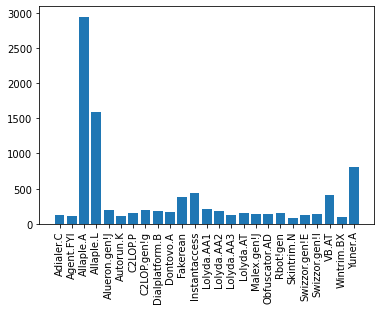

In [80]:

plt.xticks(rotation='vertical')
plt.bar(familias,tabla_freguencia)

Vemos que el dataset esta desbalanceado, princpalmente por que las familias Allaple.A y Allaple.L tienen muchas observaciones, mientras uqe las demas se mantienen en un rango de 80 a 800. Sin embargo, creemos util usar todas las familias para obervar como se comporta la red nuronal ante estos casos.

In [81]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(images/255, targets, test_size=0.3, random_state=123)

In [82]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(6537, 128, 128, 3)
(2802, 128, 128, 3)
(6537, 25)
(2802, 25)


#### Combolutional Neurnal Network

In [86]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), input_shape = (128, 128, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(32, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn_model.add(Dense(256))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(128))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(25))
cnn_model.add(Activation('softmax'))

cnn_model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [87]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 activation_25 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 activation_26 (Activation)  (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                 

In [88]:
cnn_model.fit(features_train, target_train, validation_data=(features_test, target_test), epochs=5)

Epoch 1/5
205/205 [==============================] - 86s 418ms/step - loss: 2.1877 - accuracy: 0.3855 - val_loss: 1.7554 - val_accuracy: 0.5286
Epoch 2/5
205/205 [==============================] - 86s 419ms/step - loss: 1.2332 - accuracy: 0.6333 - val_loss: 0.7275 - val_accuracy: 0.8180
Epoch 3/5
205/205 [==============================] - 88s 429ms/step - loss: 0.5783 - accuracy: 0.8279 - val_loss: 0.3621 - val_accuracy: 0.8833
Epoch 4/5
205/205 [==============================] - 88s 427ms/step - loss: 0.3547 - accuracy: 0.8938 - val_loss: 0.2066 - val_accuracy: 0.9343
Epoch 5/5
205/205 [==============================] - 90s 437ms/step - loss: 0.2670 - accuracy: 0.9200 - val_loss: 0.1718 - val_accuracy: 0.9500


El valor final de val_accuracy representa el accuracy sobre los datos del conjunto de prueba, esto significa que tiene un accuracy de 0.95 sobre estos lo que nos indica que es un buen modelo.

In [91]:
# Comprobacion sobre conjunto de prueba
scores = cnn_model.evaluate(features_test, target_test)
print("Accuracy exacta sobre el conjunto de prueba:", scores[1])

88/88 [==============================] - 6s 66ms/step - loss: 0.1718 - accuracy: 0.9500
Accuracy exacta sobre el conjunto de prueba: 0.9500356912612915


In [93]:
import seaborn as sn
import pandas as pd

def get_cf(cf):
    class_names=[0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sn.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)

In [94]:
test_predict = np.argmax(cnn_model.predict(features_test), axis=-1)

In [97]:
target_test = np.argmax(target_test, axis=-1)

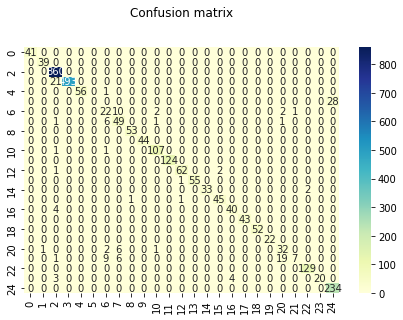

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, test_predict)
get_cf(cm)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(target_test, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      1.00      0.99        39
           2       0.96      1.00      0.98       860
           3       1.00      0.96      0.98       514
           4       1.00      0.98      0.99        57
           5       0.00      0.00      0.00        28
           6       0.54      0.59      0.56        37
           7       0.69      0.84      0.76        58
           8       0.98      1.00      0.99        53
           9       1.00      1.00      1.00        44
          10       0.96      0.98      0.97       109
          11       1.00      1.00      1.00       124
          12       0.97      0.95      0.96        65
          13       1.00      0.98      0.99        56
          14       1.00      0.94      0.97        35
          15       0.96      0.96      0.96        47
          16       0.91      0.91      0.91        44
          17       1.00    

c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Vemos que en su mayoria las familias de malware se clasificaron de manera correcta, algunas confusiones pero en su mayoria bastnate bien. Sin embargo, si hay una familia que no se clasifico niguna de sus obervaciones como tal esta fue Autorun.K la cual fue confundida en su completitud con Yuner.A. Este es el unico caso en donde la confusion si fue alta, viendo las imagenes si podemos llegar a entender dicha confusion ya que ambas comparten la caracteristica de tener lineas negras consistentes en la parte inferior de sus imagenes, para estas familias abria que utilizar alguna otra tecnica para diferenciarlas correctamente, posiblemente un procesado de imagenes mas profundo antes de la realizacion del modelo. Luego vemos metricas bajas en Swizzor.gen!E, Swizzor.gen!I y C2LOP.P, C2LOP.gen!g, sin embargo, esto sucede ya que son de la misma familia pero de una subcategoria diferente.